In [1]:
# WARNING: advised to install a specific version, e.g. ampform==0.1.2
%pip install -q ampform[doc,viz] IPython

zsh:1: no matches found: ampform[doc,viz]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os

STATIC_WEB_PAGE = {"EXECUTE_NB", "READTHEDOCS"}.intersection(os.environ)

```{autolink-concat}
```

# Amplitude symmetrization

In [3]:
import graphviz
import qrules
import sympy as sp
from IPython.display import Math

import ampform
from ampform.dynamics.builder import RelativisticBreitWignerBuilder
from ampform.helicity.decay import perform_combinatorics
from ampform.io import aslatex

Amplitudes for reactions with indistinguishable particles in the final state, such as $D^+ \to \pi^+ \pi^+ \pi^-$, should be symmetrized, meaning that the amplitudes of the different subsystems are indistinguishable but for kinematic variables.

Note that QRules removes transitions that are indistinguishable, since it only considers quantum states, not relativistic kinematics.

In [4]:
reaction = qrules.generate_transitions(
    initial_state="D+",
    final_state=["pi+", "pi+", "pi-"],
    allowed_intermediate_particles=["rho(770)0"],
)

Propagating quantum numbers:   0%|          | 0/18 [00:00<?, ?it/s]

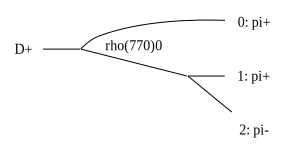

In [5]:
src = qrules.io.asdot(reaction, strip_spin=True)
graphviz.Source(src)

Internally, AmpForm's {class}`.HelicityAmplitudeBuilder` permutates these transitions again, so that all kinematically distinguishable subsystems are available.

In [6]:
assert len(reaction.transitions) == 1
permutated_topologies = perform_combinatorics(reaction.transitions[0])

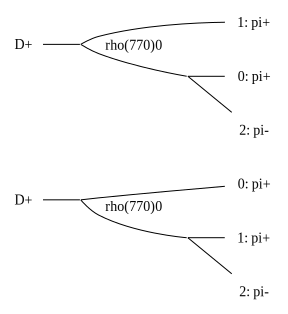

In [7]:
src = qrules.io.asdot(permutated_topologies, strip_spin=True)
graphviz.Source(src)

The resulting {class}`.HelicityModel` contains only one amplitude that contains two terms with different kinematic variables:

In [8]:
bw_builder = RelativisticBreitWignerBuilder()
model_builder = ampform.HelicityAmplitudeBuilder(reaction)
for name in reaction.get_intermediate_particles().names:
    model_builder.dynamics.assign(name, bw_builder)
model = model_builder.formulate()
Math(aslatex(model.amplitudes, terms_per_line=1))

<IPython.core.display.Math object>

but the parameters of both amplitudes are the same:

In [9]:
assert len(model.amplitudes) == 1
((symbol, expr),) = model.amplitudes.items()
expr = sp.simplify(expr, doit=False)
Math(aslatex({symbol: expr}))

<IPython.core.display.Math object>

In [10]:
Math(aslatex(model.parameter_defaults))

<IPython.core.display.Math object>

## Example: $J/\psi \to \gamma \pi^0 \pi^0$

In [11]:
example_reaction = qrules.generate_transitions(
    initial_state="J/psi(1S)",
    final_state=["gamma", "pi0", "pi0"],
    allowed_intermediate_particles=["omega(782)"],
    formalism="helicity",
)

Propagating quantum numbers:   0%|          | 0/36 [00:00<?, ?it/s]

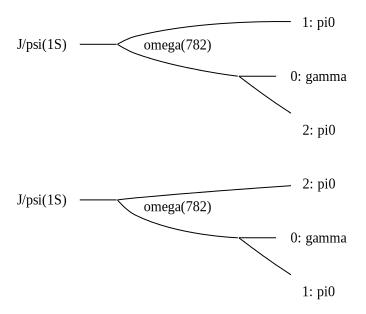

In [12]:
src = qrules.io.asdot(perform_combinatorics(example_reaction.transitions[0]), strip_spin=True)
graphviz.Source(src)

In [20]:
example_bw_builder = RelativisticBreitWignerBuilder()
example_model_builder = ampform.HelicityAmplitudeBuilder(example_reaction)
for name in example_reaction.get_intermediate_particles().names:
    example_model_builder.dynamics.assign(name, example_bw_builder)
example_model = example_model_builder.formulate()
first_key, first_value = next(iter(example_model.amplitudes.items()))
Math(aslatex({first_key: first_value}, terms_per_line=1))

<IPython.core.display.Math object>